In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split

pd.set_option('display.float_format',lambda x:'{: .2f}'.format(x))
np.set_printoptions(suppress=True)

In [9]:
df_customers = pd.read_csv("datasets/customers.csv")
df_loans = pd.read_csv("datasets/loans.csv")
df_bureau = pd.read_csv("datasets/bureau_data.csv")

In [10]:
df_customers.shape,df_loans.shape,df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [11]:
df = pd.merge(df_customers,df_loans,on="cust_id")
df.head(5)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,loan_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001,L00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001,L00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001,L00003,Personal,Unsecured,2401000,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,560001,L00004,Personal,Unsecured,2345000,1747000,34940.00,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,411001,L00005,Auto,Secured,4647000,4520000,90400.00,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [12]:
df = pd.merge(df,df_bureau)
df.head(5)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,loan_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001,L00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001,L00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001,L00003,Personal,Unsecured,2401000,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,560001,L00004,Personal,Unsecured,2345000,1747000,34940.00,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False,3,0,115,15,87,5,26
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,411001,L00005,Auto,Secured,4647000,4520000,90400.00,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False,4,2,120,0,0,5,10


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [16]:
df["default"] = df["default"].astype(int)
df["default"].value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

In [21]:
X = df.drop("default",axis=1)
Y = df["default"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

df_train = pd.concat([X_train,Y_train],axis="columns")
df_test = pd.concat([X_test,Y_test],axis="columns")

df_train.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,loan_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
27434,C27435,45,F,Single,Salaried,1131000,0,Owned,5,Ahmedabad,Gujarat,380001,L27435,Home,Secured,3458000,3276000,65520.00,589680,2620800,24,905176,566117,2022-04-21,2022-05-21,4,2,90,6,33,8,59,0
13400,C13401,29,M,Single,Salaried,2343000,0,Owned,25,Delhi,Delhi,110001,L13401,Auto,Secured,3103000,2540000,50800.00,457200,2032000,33,1008916,951329,2020-11-24,2020-12-11,3,1,119,4,17,4,92,0
883,C00884,50,F,Single,Self-Employed,2891000,0,Mortgage,29,Lucknow,Uttar Pradesh,226001,L00884,Personal,Unsecured,2288000,1920000,38400.00,345600,1536000,19,1382399,771873,2019-08-25,2019-09-19,2,1,83,14,78,4,83,0
7303,C07304,43,F,Single,Self-Employed,272000,1,Owned,27,Bangalore,Karnataka,560001,L07304,Auto,Secured,307000,298000,5960.00,53640,238400,21,170015,117343,2020-04-16,2020-05-05,1,1,37,0,0,5,34,0
45124,C45125,31,F,Single,Salaried,141000,0,Owned,27,Jaipur,Rajasthan,302001,L45125,Education,Secured,283000,260000,5200.00,46800,208000,45,72025,67719,2024-01-26,2024-02-17,2,0,62,6,28,5,19,0


In [22]:
df_train.shape,df_test.shape

((37500, 33), (12500, 33))

In [23]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 48
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [30]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [33]:
mode_residence = df_train.residence_type.mode()[0]
mode_residence

'Owned'

In [34]:
df_train.residence_type.fillna(mode_residence,inplace=True)
df_train.residence_type.isna().sum()

np.int64(0)

In [35]:
df_test.residence_type.fillna(mode_residence,inplace=True)

In [36]:
df_train.duplicated().sum()

np.int64(0)

In [37]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [38]:
columns_continous = ["age","income","number_of_dependants","years_at_current_address","sanction_amount",
                    "loan_amount","processing_fee","gst","net_disbursement","loan_tenure_months","principal_outstanding",
                    "bank_balance_at_application","number_of_open_accounts","number_of_closed_accounts",
                    "total_loan_months","delinquent_months",'total_dpd', 'enquiry_count', 'credit_utilization_ratio']

columns_categorical =['gender', 'marital_status', 'employment_status','residence_type','city', 'state', 'zipcode',
                     'loan_purpose', 'loan_type','default']

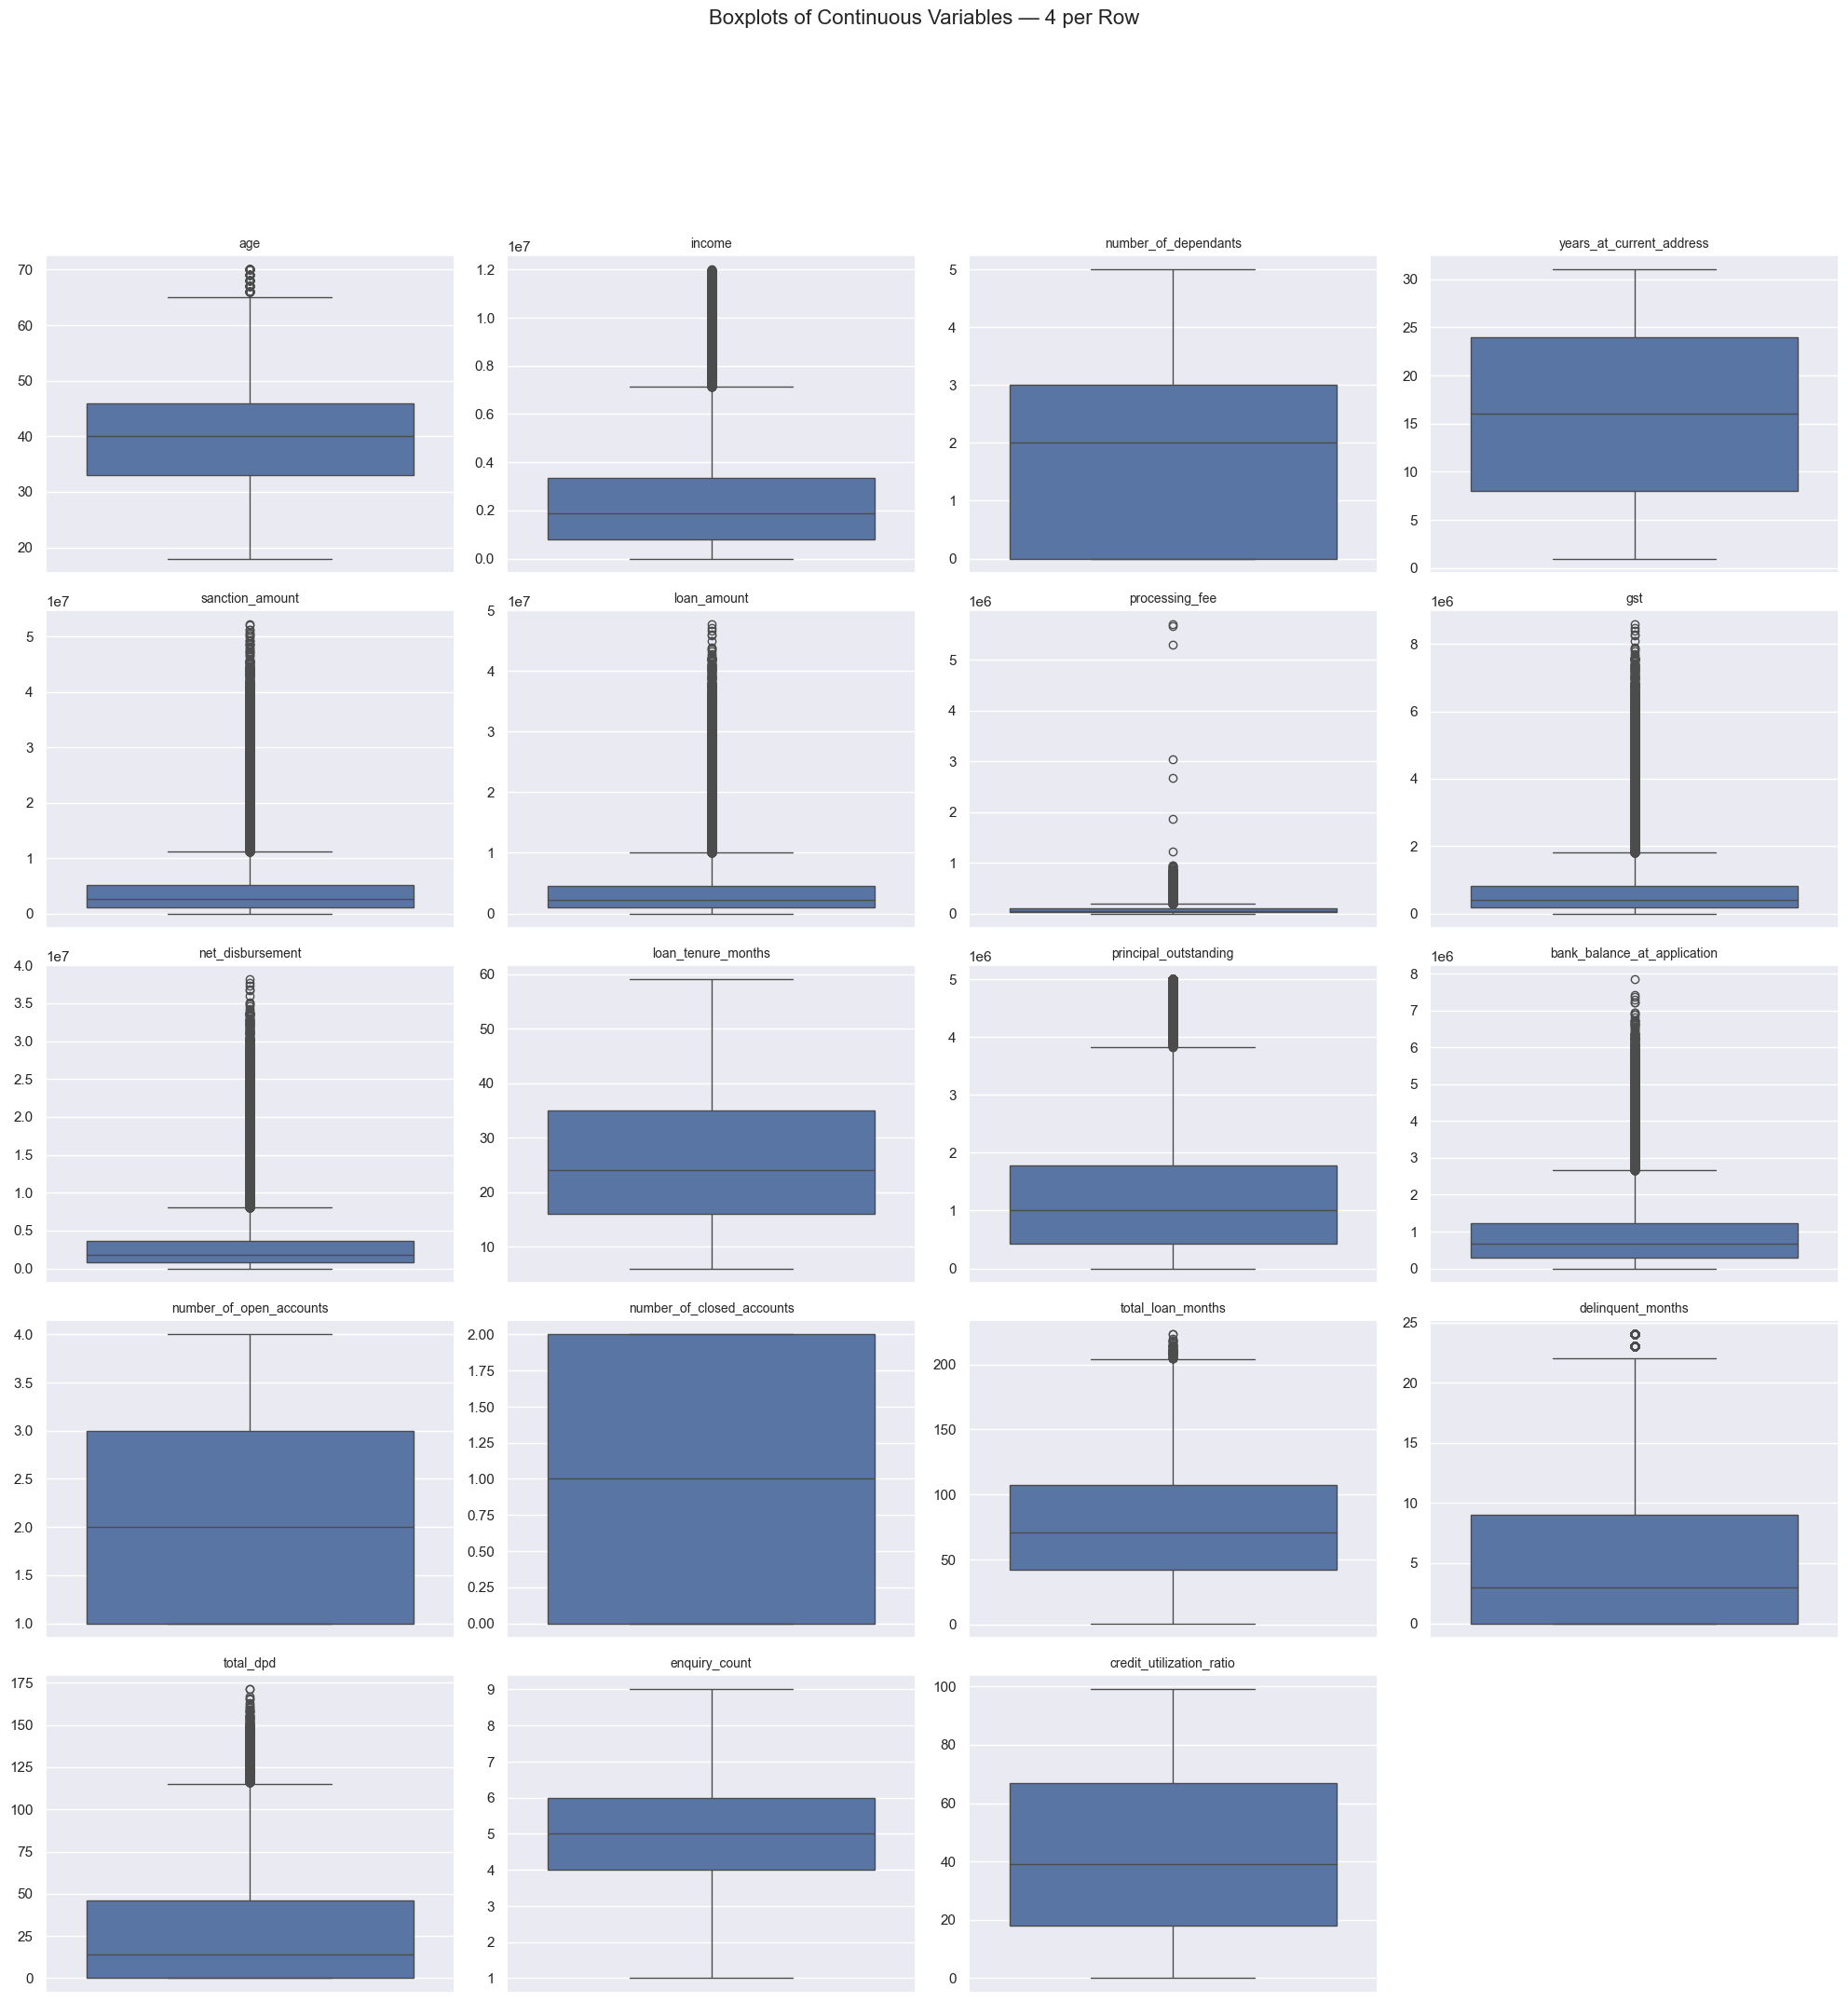

In [48]:
n = len(columns_continous)
cols = 4
rows = (n + cols - 1)

# Create figure and axes grid
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), squeeze=False)
sns.set()

for ax, var in zip(axes.flatten(), columns_continous):
    sns.boxplot(y=df_train[var], ax=ax)
    ax.set_title(var, fontsize=10)
    ax.set_ylabel('')  

for ax in axes.flatten()[n:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
fig.suptitle('Boxplots of Continuous Variables — 4 per Row', fontsize=16)
plt.show()

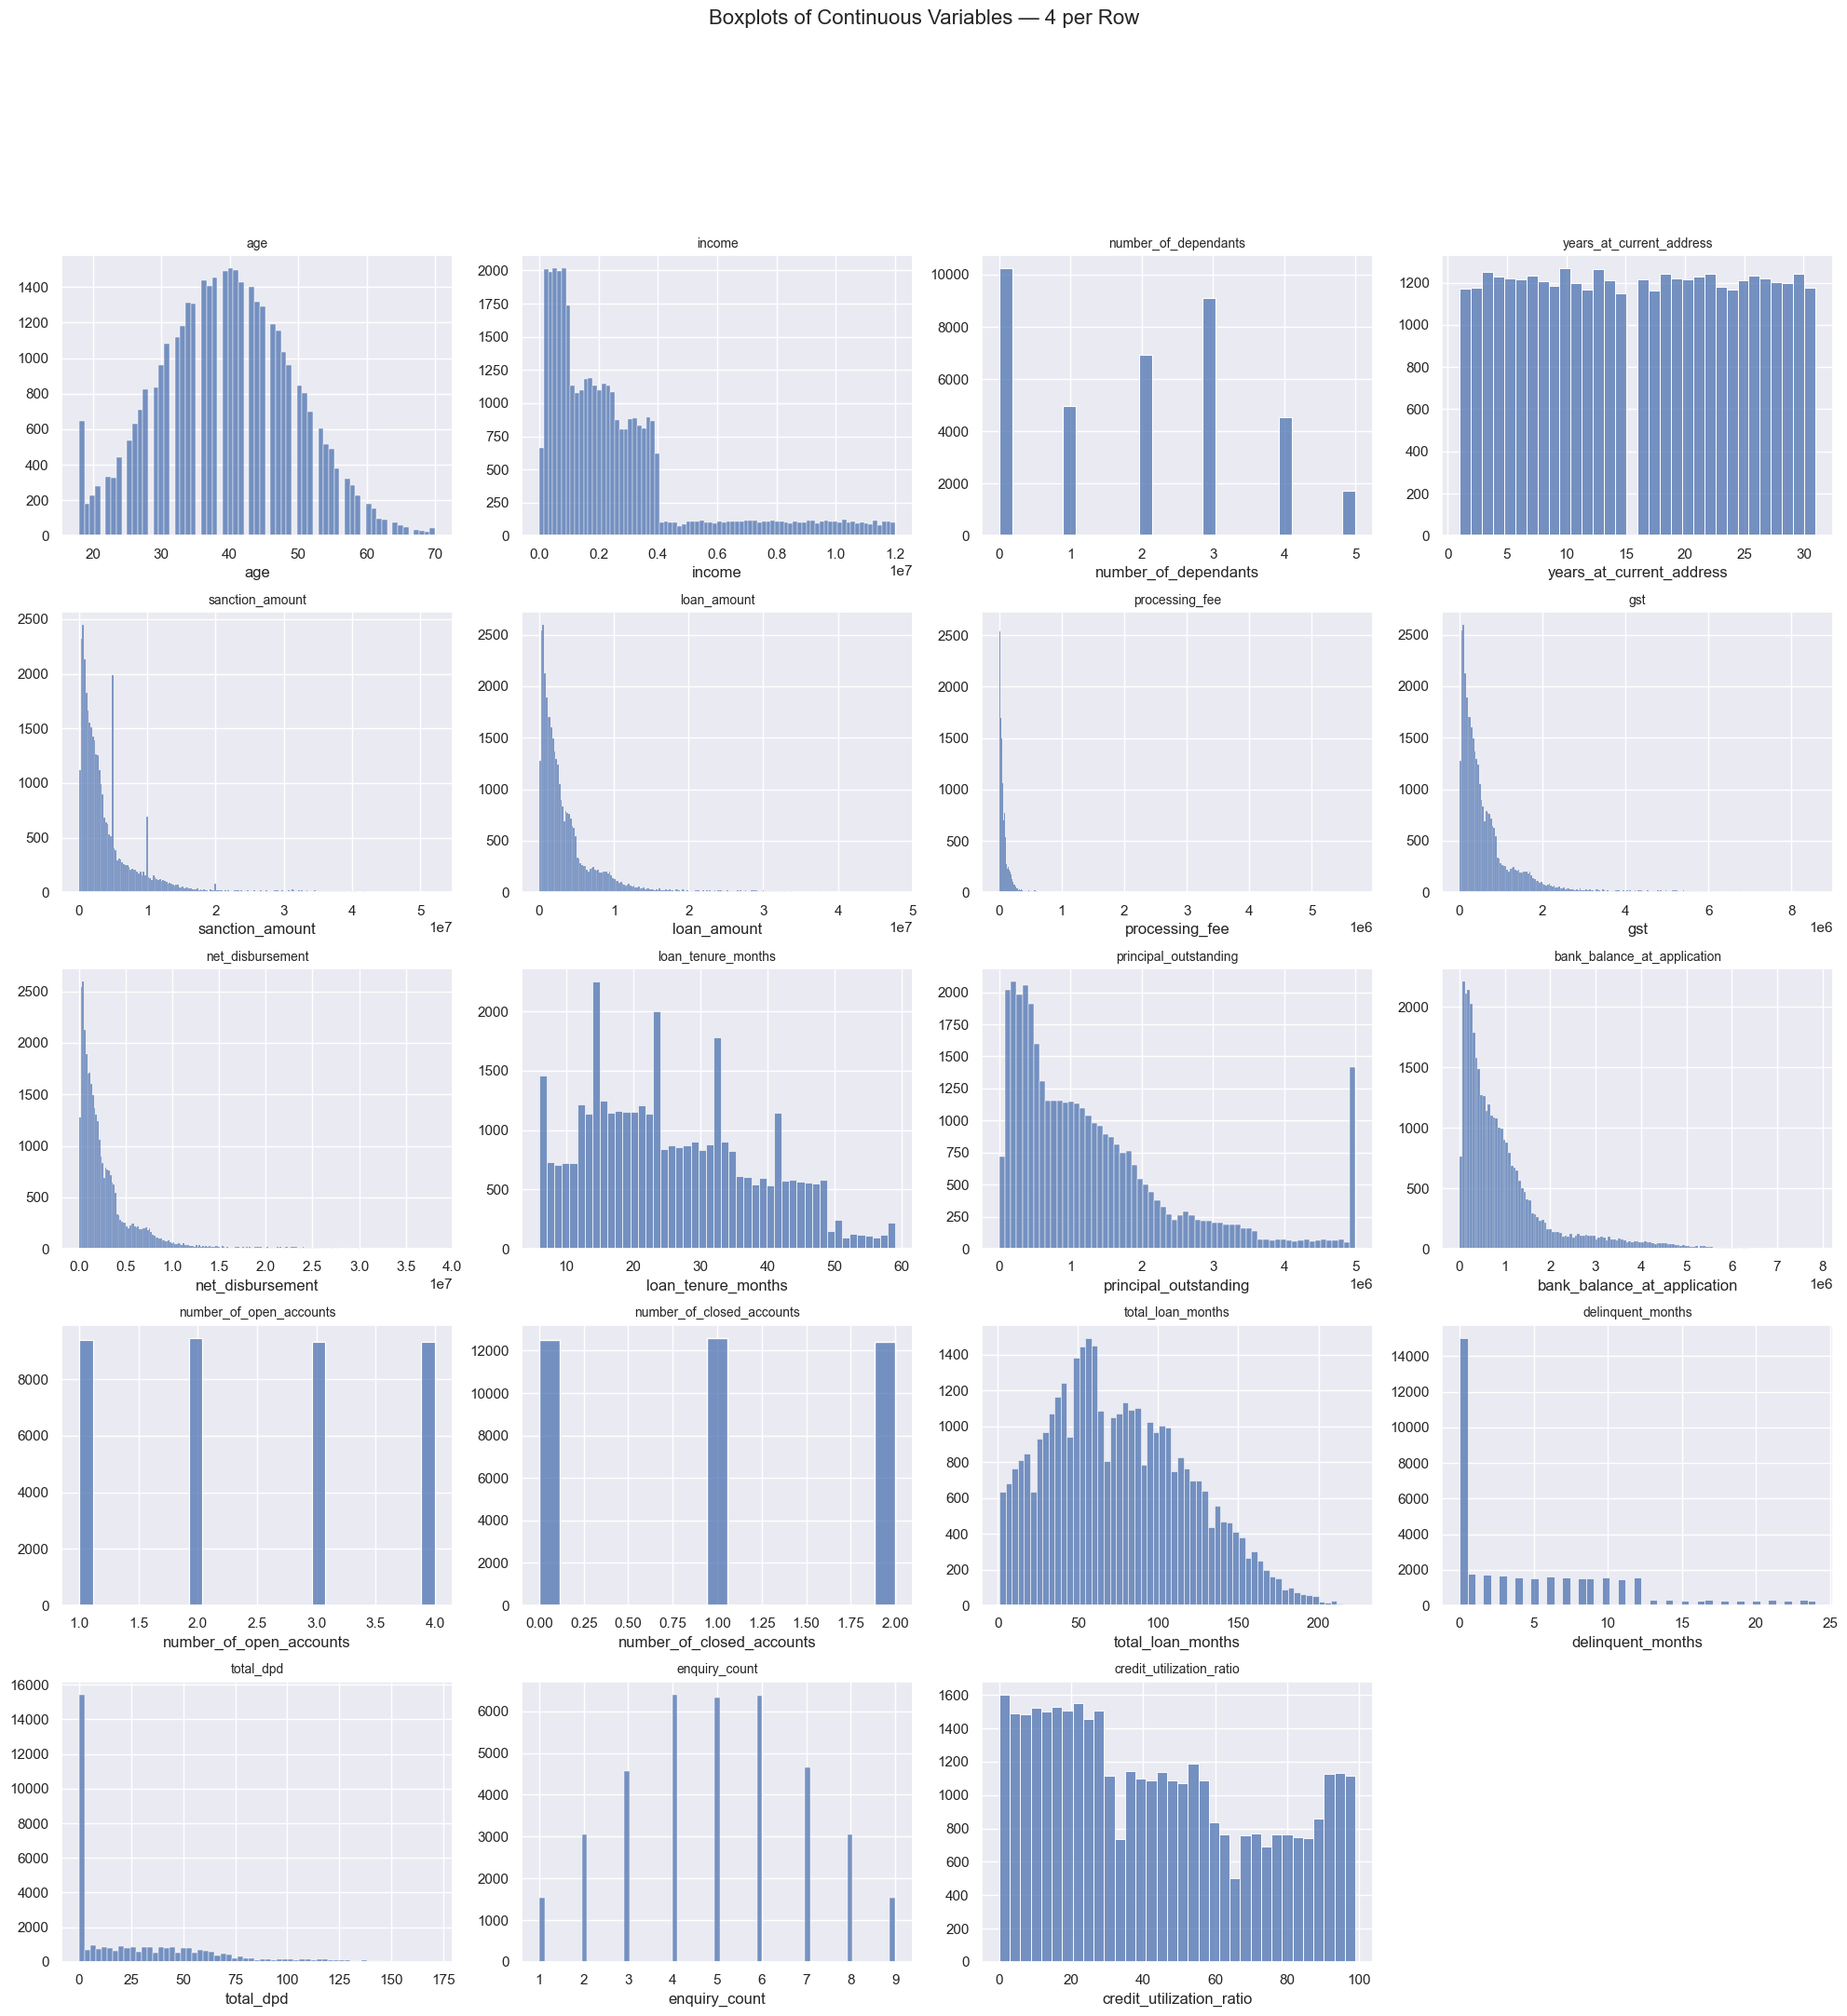

In [50]:
n = len(columns_continous)
cols = 4
rows = (n + cols - 1)

# Create figure and axes grid
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), squeeze=False)
sns.set()

for ax, var in zip(axes.flatten(), columns_continous):
    sns.histplot(x=df_train[var], ax=ax)
    ax.set_title(var, fontsize=10)
    ax.set_ylabel('')  

for ax in axes.flatten()[n:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
fig.suptitle('Boxplots of Continuous Variables — 4 per Row', fontsize=16)
plt.show()

In [51]:
df_train.processing_fee.describe()

count      37500.00
mean       80724.11
std       120830.65
min            0.00
25%        19180.00
50%        44700.00
75%        92000.00
max      5698029.90
Name: processing_fee, dtype: float64

In [57]:
df_train[(df_train.processing_fee/df_train.loan_amount)>0.03][["loan_amount","processing_fee"]]

,loan_amount,processing_fee
23981,2234000,2669791.02
9898,3626000,5293543.52
47089,1738000,1858964.77
33705,3812000,5678020.86
12294,4639000,5698029.90
28174,966000,1214492.67
29305,2616000,3036378.01


In [58]:
df_train1 = df_train[(df_train.processing_fee/df_train.loan_amount)<0.03].copy()
df_train1[(df_train1.processing_fee/df_train1.loan_amount)>0.03][["loan_amount","processing_fee"]]

,loan_amount,processing_fee


In [59]:
df_test1 = df_test[(df_test.processing_fee/df_test.loan_amount)<0.03].copy()
df_test1[(df_test1.processing_fee/df_test1.loan_amount)>0.03][["loan_amount","processing_fee"]]

,loan_amount,processing_fee


In [60]:
df_test1.shape

(12498, 33)

In [61]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [63]:
for col in columns_categorical:
    print(col,"--",df_train1[col].unique())

gender -- ['F' 'M']
marital_status -- ['Single' 'Married']
employment_status -- ['Salaried' 'Self-Employed']
residence_type -- ['Owned' 'Mortgage' 'Rented']
city -- ['Ahmedabad' 'Delhi' 'Lucknow' 'Bangalore' 'Jaipur' 'Hyderabad' 'Kolkata'
 'Pune' 'Chennai' 'Mumbai']
state -- ['Gujarat' 'Delhi' 'Uttar Pradesh' 'Karnataka' 'Rajasthan' 'Telangana'
 'West Bengal' 'Maharashtra' 'Tamil Nadu']
zipcode -- [380001 110001 226001 560001 302001 500001 700001 411001 600001 400001]
loan_purpose -- ['Home' 'Auto' 'Personal' 'Education' 'Personaal']
loan_type -- ['Secured' 'Unsecured']
default -- [0 1]


In [64]:
df_train1["loan_purpose"] = df_train1["loan_purpose"].replace("Personaal","Personal")
df_test1["loan_purpose"] = df_test1["loan_purpose"].replace("Personaal","Personal")
df_train1.loan_purpose.unique()

array(['Home', 'Auto', 'Personal', 'Education'], dtype=object)

<h3 align="center" style="color:blue"> Exploratory Data Analysis </h3>

In [71]:
columns_continous

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio']

<Axes: xlabel='age', ylabel='Density'>

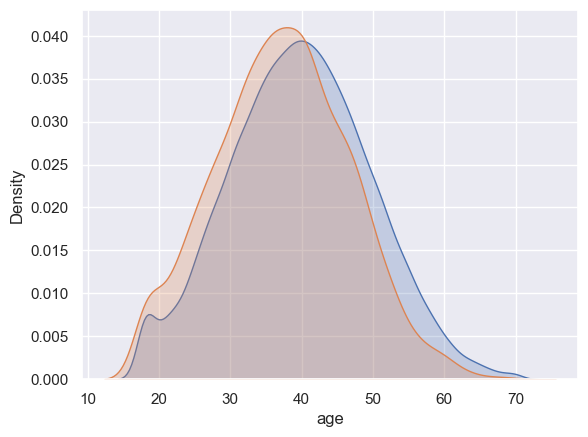

In [75]:
sns.kdeplot(df_train1[df_train1.default==0]["age"],fill=True,label="Default 0")
sns.kdeplot(df_train1[df_train1.default==1]["age"],fill=True,label="Default 1")

Insights
1. Orange graph is little bit shifted to the left of blue graph.The people with young age are more likely to default

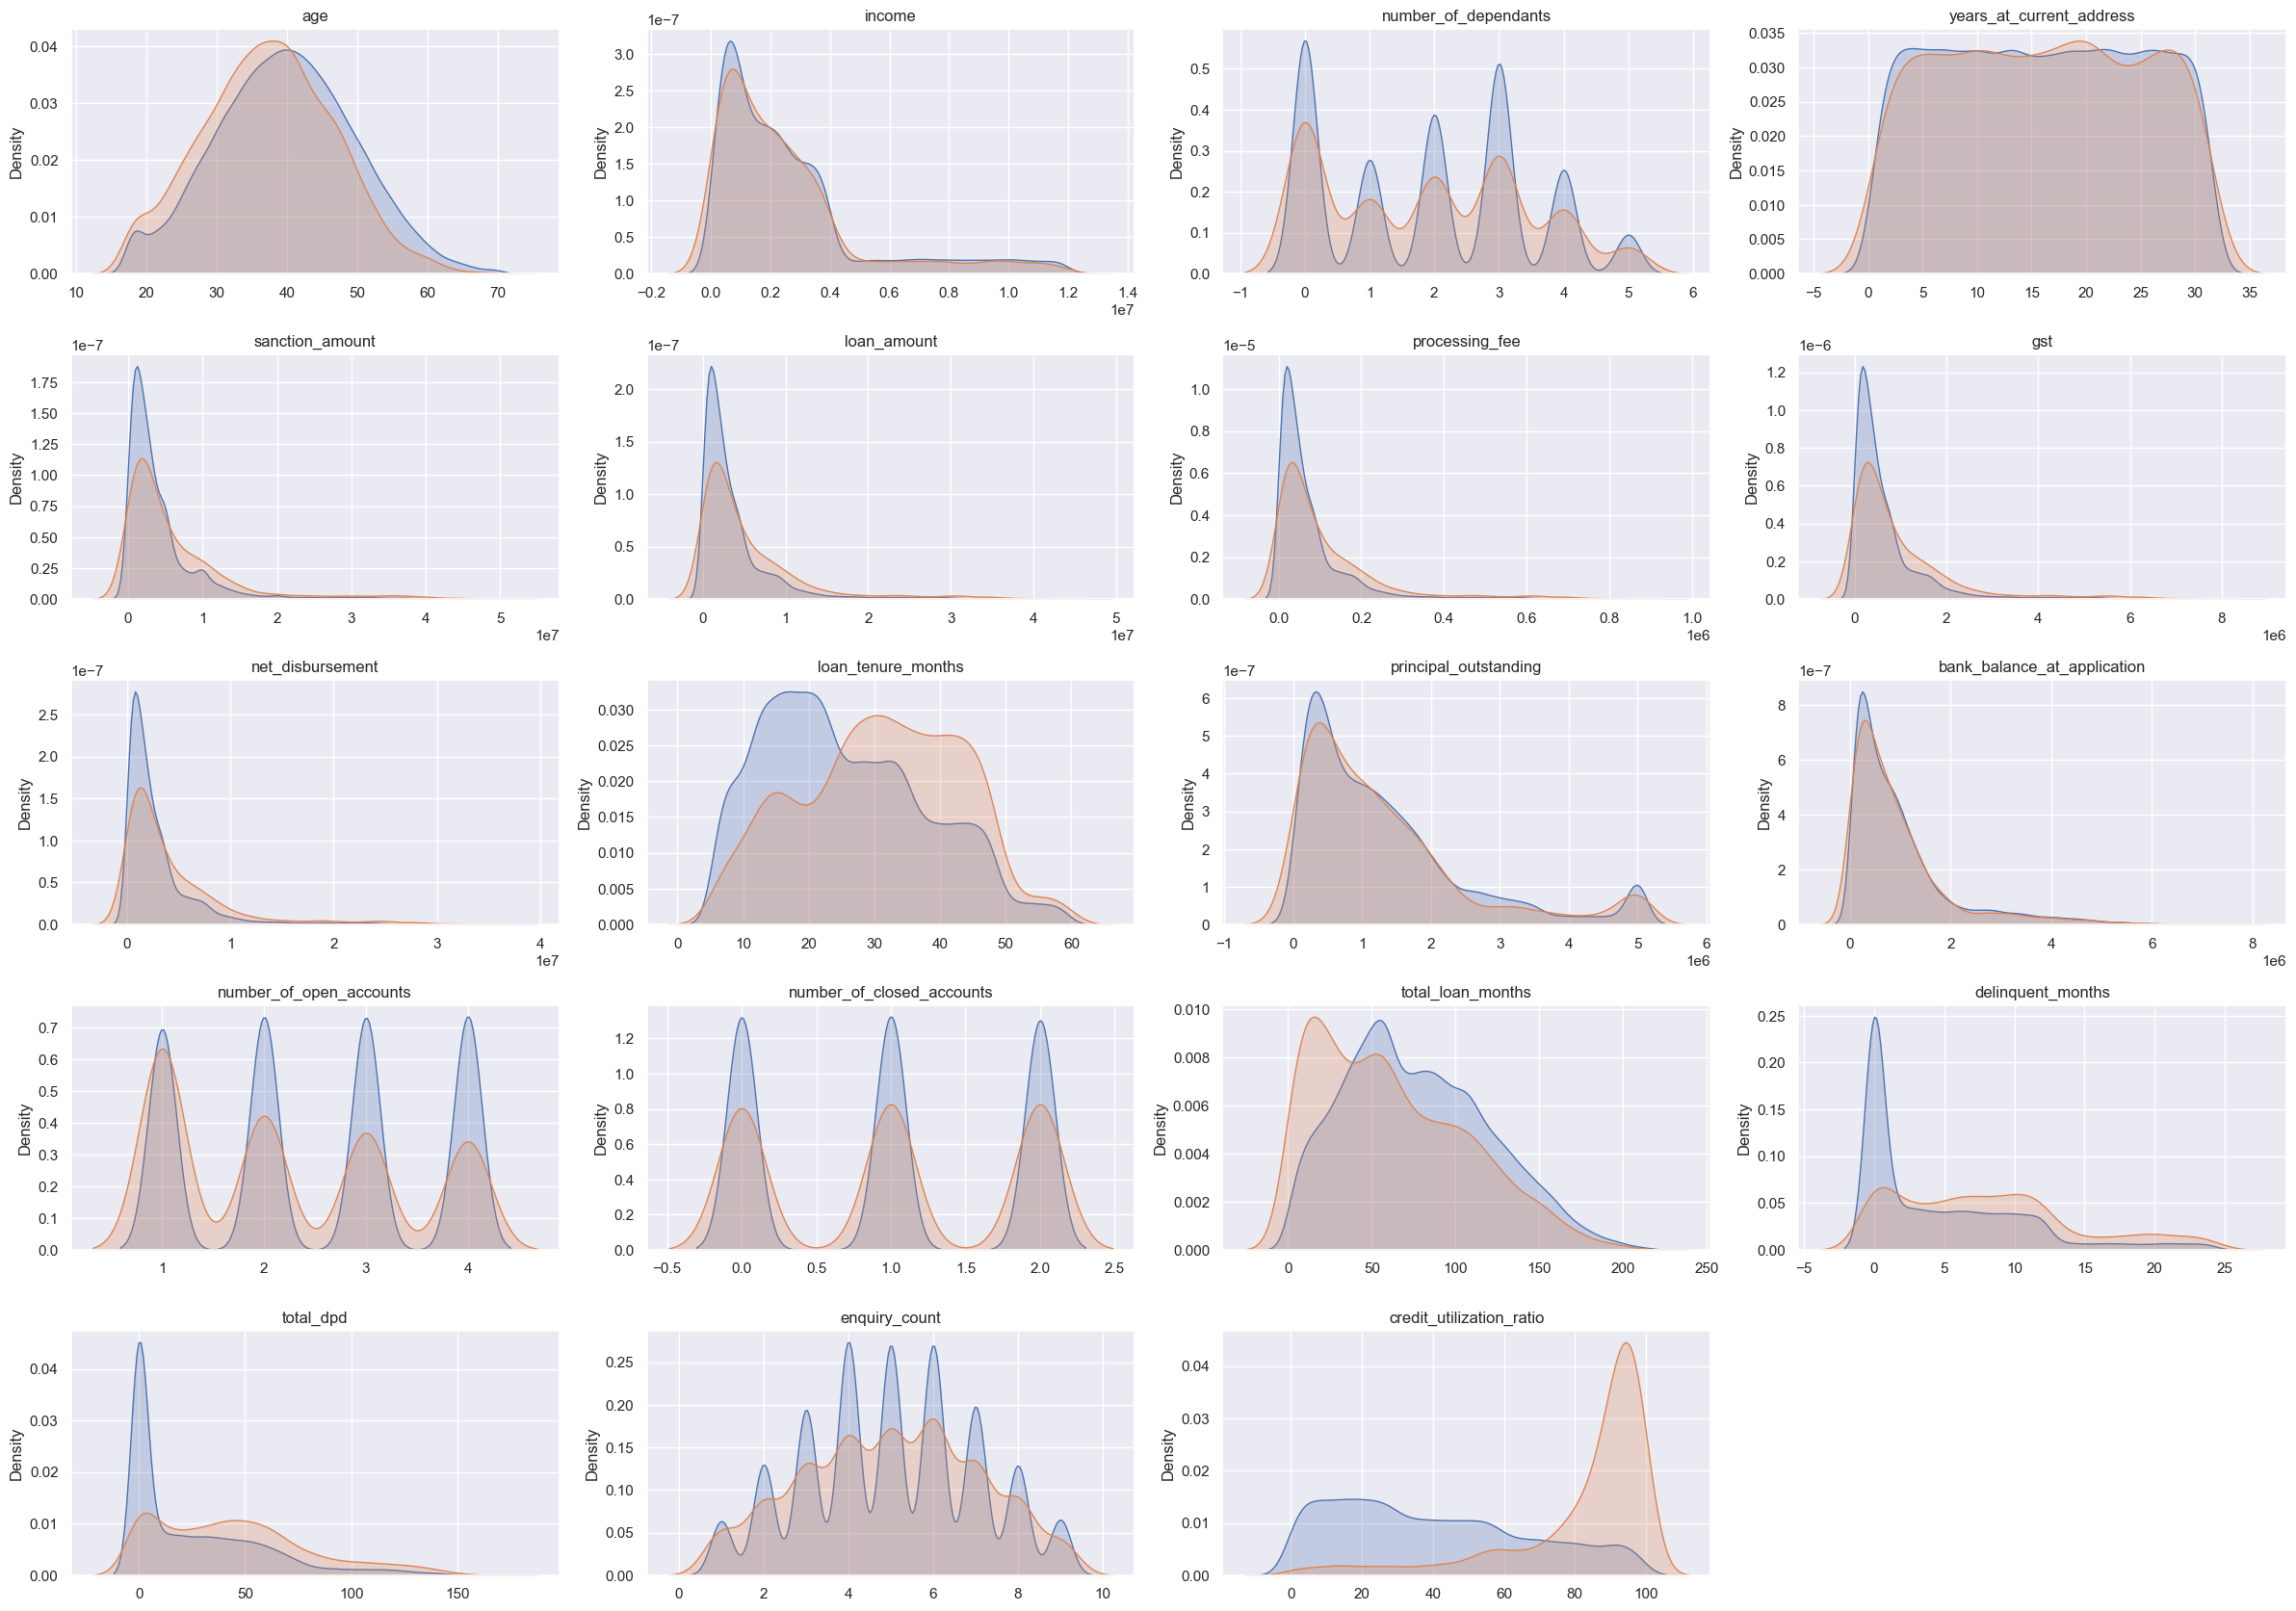

In [77]:
plt.figure(figsize=(24,20))

for i,col in enumerate(columns_continous):
    plt.subplot(6,4,i+1)
    sns.kdeplot(df_train1[col][df_train1.default==0],fill=True,label="Default 0")
    sns.kdeplot(df_train1[col][df_train1.default==1],fill=True,label="Default 1")
    plt.title(col)
    plt.xlabel('')

plt.tight_layout()
plt.show()

<h3 align="center" style={color:"blue"}>Feature Engineering</h3>

In [96]:
df_train1["loan_to_income"]= round(df_train1["loan_amount"]/df_train1["income"],2)
df_test1["loan_to_income"]= round(df_test1["loan_amount"]/df_test1["income"],2)
df_train1["loan_to_income"].describe()

count    37487.00
mean         1.55
std          0.97
min          0.30
25%          0.77
50%          1.16
75%          2.45
max          4.57
Name: loan_to_income, dtype: float64

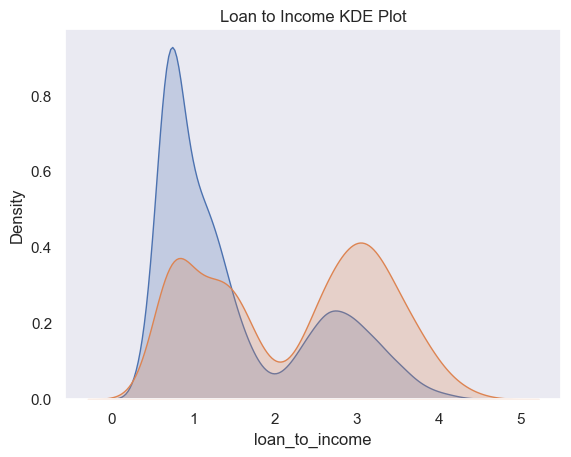

In [83]:
sns.kdeplot(df_train1[df_train1.default==0]["loan_to_income"],fill=True,label="Default 0")
sns.kdeplot(df_train1[df_train1.default==1]["loan_to_income"],fill=True,label="Default 1")
plt.title("Loan to Income KDE Plot")
plt.grid()

In [84]:
df_train1[["delinquent_months","total_loan_months"]]

,delinquent_months,total_loan_months
27434,6,90
13400,4,119
883,14,83
7303,0,37
45124,6,62
...,...,...
11284,23,129
44732,0,80
38158,0,8
860,5,130


In [86]:
df_train1["delinquency_ratio"] = round(df_train1["delinquent_months"]*100/df_train1["total_loan_months"],1)
df_test1["delinquency_ratio"] = round(df_test1["delinquent_months"]*100/df_test1["total_loan_months"],1)
df_train1["delinquency_ratio"]

27434     6.70
13400     3.40
883      16.90
7303      0.00
45124     9.70
         ...  
11284    17.80
44732     0.00
38158     0.00
860       3.80
15795     4.90
Name: delinquency_ratio, Length: 37487, dtype: float64

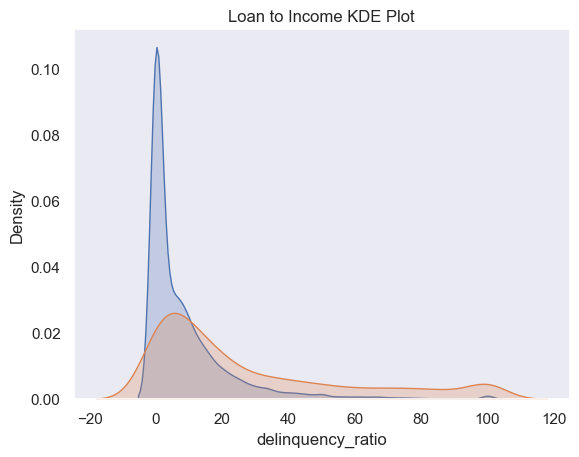

In [87]:
sns.kdeplot(df_train1[df_train1.default==0]["delinquency_ratio"],fill=True,label="Default 0")
sns.kdeplot(df_train1[df_train1.default==1]["delinquency_ratio"],fill=True,label="Default 1")
plt.title("Loan to Income KDE Plot")
plt.grid()

In [95]:
df_train1["avg_dpd_per_delinquency"] = np.where(
    df_train1["delinquent_months"] !=0,
    (df_train1["total_dpd"]/df_train1["delinquent_months"]).round(1),
    0
)
df_test1["avg_dpd_per_delinquency"] = np.where(
    df_test1["delinquent_months"] !=0,
    (df_test1["total_dpd"]/df_test1["delinquent_months"]).round(1),
    0
)
df_train1["avg_dpd_per_delinquency"].describe()

count    37487.00
mean         3.29
std          2.90
min          0.00
25%          0.00
50%          4.30
75%          5.80
max         10.00
Name: avg_dpd_per_delinquency, dtype: float64

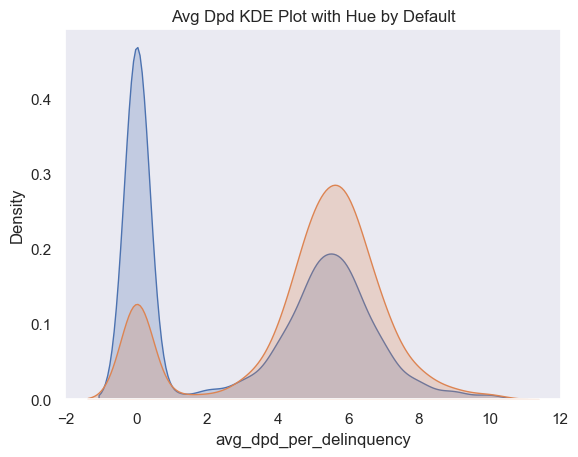

In [93]:
sns.kdeplot(df_train1[df_train1.default==0]["avg_dpd_per_delinquency"],fill=True,label="Default 0")
sns.kdeplot(df_train1[df_train1.default==1]["avg_dpd_per_delinquency"],fill=True,label="Default 1")
plt.title("Avg Dpd KDE Plot with Hue by Default")
plt.grid()

In [94]:
df_train1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

### Feature selection

In [97]:
df_train_2 = df_train1.drop(["cust_id","loan_id"],axis="columns")
df_test_2 = df_test1.drop(["cust_id","loan_id"],axis="columns")

In [98]:
df_train_3 = df_train_2.drop(["disbursal_date","installment_start_dt","loan_amount"
                             ,"income","delinquent_months","total_dpd","total_loan_months"],axis="columns")
df_test_3 = df_test_2.drop(["disbursal_date","installment_start_dt","loan_amount"
                             ,"income","delinquent_months","total_dpd","total_loan_months"],axis="columns")

df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [106]:
df_train_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37487 entries, 27434 to 15795
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          37487 non-null  int64  
 1   gender                       37487 non-null  object 
 2   marital_status               37487 non-null  object 
 3   employment_status            37487 non-null  object 
 4   number_of_dependants         37487 non-null  int64  
 5   residence_type               37487 non-null  object 
 6   years_at_current_address     37487 non-null  int64  
 7   city                         37487 non-null  object 
 8   state                        37487 non-null  object 
 9   zipcode                      37487 non-null  int64  
 10  loan_purpose                 37487 non-null  object 
 11  loan_type                    37487 non-null  object 
 12  sanction_amount              37487 non-null  int64  
 13  processing_fee   

In [108]:
df_train_3.select_dtypes(include=["int64", "float64"]).drop(columns=["default"]).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [110]:
X_train = df_train_3.drop('default',axis="columns")
Y_train = df_train_3['default']


from sklearn.preprocessing import MinMaxScaler

cols_to_scale =(
    df_train_3
    .select_dtypes(include=["int64", "float64"])
    .drop(columns=["default"])
    .columns
)


scaler = MinMaxScaler()
X_train[cols_to_scale]=scaler.fit_transform(X_train[cols_to_scale])

X_train.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00
mean,0.41,0.39,0.50,0.52,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.10,0.33
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.23,0.24,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,0.49,0.05,0.05,0.05,0.05,0.34,0.19,0.08,0.33,0.50,0.50,0.39,0.20,0.04,0.43
75%,0.54,0.60,0.77,0.76,0.10,0.10,0.10,0.10,0.55,0.35,0.16,0.67,1.00,0.62,0.68,0.50,0.13,0.58
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [112]:
X_test = df_test_3.drop('default',axis="columns")
Y_test = df_test_3['default']

cols_to_scale =(
    df_train_3
    .select_dtypes(include=["int64", "float64"])
    .drop(columns=["default"])
    .columns
)

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,delinquency_ratio,avg_dpd_per_delinquency,loan_to_income
count,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00
mean,0.41,0.39,0.50,0.53,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.51,0.50,0.44,0.10,0.33,0.29
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.24,0.25,0.13,0.37,0.41,0.26,0.30,0.17,0.29,0.23
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.00,0.00,0.11
50%,0.42,0.40,0.50,0.51,0.05,0.05,0.05,0.05,0.36,0.20,0.08,0.67,0.50,0.50,0.39,0.04,0.43,0.20
75%,0.54,0.60,0.77,0.76,0.10,0.10,0.10,0.10,0.55,0.35,0.16,1.00,1.00,0.75,0.68,0.13,0.58,0.50
max,1.00,1.00,1.00,1.00,0.95,1.00,1.00,1.00,1.00,1.00,0.88,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df["Column"]=data.columns
    vif_df["VIF"] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [117]:
calculate_vif(X_train[cols_to_scale])

C:\Users\91999\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.72
1,number_of_dependants,2.73
2,years_at_current_address,3.42
3,zipcode,3.79
4,sanction_amount,102.15
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.14
9,principal_outstanding,16.28


In [132]:
features_to_drop = ["sanction_amount","processing_fee","gst","net_disbursement","principal_outstanding"]

numeric_column =X_train_1.select_dtypes(include=["int64", "float64"]).columns


X_train_1 = X_train.drop(features_to_drop,axis="columns")
numeric_column

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [134]:
vif_df = calculate_vif(X_train_1[numeric_column])
vif_df

,Column,VIF
0,age,5.45
1,number_of_dependants,2.73
2,years_at_current_address,3.41
3,zipcode,3.77
4,loan_tenure_months,5.98
5,bank_balance_at_application,1.80
6,number_of_open_accounts,4.32
7,number_of_closed_accounts,2.35
8,enquiry_count,6.37
9,credit_utilization_ratio,2.92


In [135]:
selected_numeric_features_vif = vif_df.Column.values
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'], dtype=object)

In [136]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [ ]:
temp = pd.concat([X_train_1,Y_train],axis=1)
temp.groupby('loan_purpose')

In [146]:
def calculate_woe(df,feature,target):
    grouped = df.groupby(feature)[target].agg(['count','sum'])
    grouped = grouped.rename(columns={'count':'total','sum':'good'})
    grouped["bad"] = grouped["total"]-grouped["good"]
    total_good = grouped["good"].sum()
    total_bad = grouped["bad"].sum()
    grouped["good_pct"] = grouped["good"] / total_good
    grouped["bad_pct"] = grouped["bad"] / total_bad
    grouped["woe"]=np.log( grouped["good_pct"]/ grouped["bad_pct"])
    grouped["iv"] = grouped["woe"]*(grouped["good_pct"]-grouped["bad_pct"])

    grouped["woe"]=grouped["woe"].replace([np.inf,-np.inf],0)
    grouped["iv"] = grouped["iv"].replace([np.inf,-np.inf],0)

    total_iv = grouped["iv"].sum()
    return grouped,total_iv

grouped,total_iv = calculate_woe(pd.concat([X_train_1,Y_train],axis=1),"loan_purpose","default")
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7437,314,7123,0.10,0.21,-0.75,0.08
Education,5626,546,5080,0.17,0.15,0.14,0.00
Home,11271,1744,9527,0.55,0.28,0.68,0.18
Personal,13153,585,12568,0.18,0.37,-0.69,0.13


In [160]:
X_train_1.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [161]:
pd.cut(X_train_1["age"],bins=10)

27434    (0.5, 0.6]
13400    (0.2, 0.3]
883      (0.6, 0.7]
7303     (0.4, 0.5]
45124    (0.2, 0.3]
            ...    
11284    (0.2, 0.3]
44732    (0.2, 0.3]
38158    (0.3, 0.4]
860      (0.4, 0.5]
15795    (0.3, 0.4]
Name: age, Length: 37487, dtype: category
Categories (10, interval[float64, right]): [(-0.001, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.6, 0.7] < (0.7, 0.8] < (0.8, 0.9] < (0.9, 1.0]]

In [162]:
iv_values={}

for feature in X_train_1.columns:
    if X_train_1[feature].dtype=="object":
        _,iv = calculate_woe(pd.concat([X_train_1,Y_train],axis=1),feature,"default")
    else:
        X_binned = pd.cut(X_train_1[feature],bins=10)
        _,iv = calculate_woe(pd.concat([X_binned,Y_train],axis=1),feature,"default")
    iv_values[feature]=iv
iv_values   

C:\Users\91999\AppData\Local\Temp\ipykernel_19448\3036666067.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(feature)[target].agg(['count','sum'])
C:\Users\91999\AppData\Local\Temp\ipykernel_19448\3036666067.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(feature)[target].agg(['count','sum'])
C:\Users\91999\AppData\Local\Temp\ipykernel_19448\3036666067.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future def

{'age': np.float64(0.07592687127752061),
 'gender': np.float64(0.000482276463421216),
 'marital_status': np.float64(0.002196681370832318),
 'employment_status': np.float64(0.002447818101774487),
 'number_of_dependants': np.float64(0.00364589452118596),
 'residence_type': np.float64(0.2594019617563985),
 'years_at_current_address': np.float64(0.001042536380353028),
 'city': np.float64(0.000817870465334103),
 'state': np.float64(0.0007881984519711978),
 'zipcode': np.float64(0.0007436024782513754),
 'loan_purpose': np.float64(0.39377543144164784),
 'loan_type': np.float64(0.17304705897793143),
 'loan_tenure_months': np.float64(0.23450610202970526),
 'bank_balance_at_application': np.float64(0.004242001247914226),
 'number_of_open_accounts': np.float64(0.07324250836253295),
 'number_of_closed_accounts': np.float64(0.00026280824021760536),
 'enquiry_count': np.float64(0.005484982638303533),
 'credit_utilization_ratio': np.float64(2.4228228499400095),
 'loan_to_income': np.float64(0.4915664

In [165]:
pd.set_option('display.float_format',lambda x:'{: .3f}'.format(x))

iv_df = pd.DataFrame(list(iv_values.items()),columns=["Feature","IV"])
iv_df = iv_df.sort_values(by="IV",ascending=False)
iv_df

,Feature,IV
17,credit_utilization_ratio,2.423
19,delinquency_ratio,0.678
18,loan_to_income,0.492
20,avg_dpd_per_delinquency,0.421
10,loan_purpose,0.394
5,residence_type,0.259
12,loan_tenure_months,0.235
11,loan_type,0.173
0,age,0.076
14,number_of_open_accounts,0.073


In [168]:
selected_features_iv = [feature for feature, iv in iv_values.items() if iv>0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

## Feature encoding

In [172]:
X_train_reduced = X_train_1[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]

X_train_reduced.head()

,age,residence_type,loan_purpose,loan_type,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
27434,0.519,Owned,Home,Secured,0.340,1.000,0.596,0.609,0.067,0.550
13400,0.212,Owned,Auto,Secured,0.509,0.667,0.929,0.183,0.034,0.420
883,0.615,Mortgage,Personal,Unsecured,0.245,0.333,0.838,0.084,0.169,0.560
7303,0.481,Owned,Auto,Secured,0.283,0.000,0.343,0.187,0.000,0.000
45124,0.250,Owned,Education,Secured,0.736,0.333,0.192,0.361,0.097,0.470


In [173]:
X_train_encoded = pd.get_dummies(X_train_reduced,drop_first=True)
X_test_encoded = pd.get_dummies(X_test_reduced,drop_first=True)

X_train_encoded.head()

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
27434,0.519,0.340,1.000,0.596,0.609,0.067,0.550,True,False,False,True,False,False
13400,0.212,0.509,0.667,0.929,0.183,0.034,0.420,True,False,False,False,False,False
883,0.615,0.245,0.333,0.838,0.084,0.169,0.560,False,False,False,False,True,True
7303,0.481,0.283,0.000,0.343,0.187,0.000,0.000,True,False,False,False,False,False
45124,0.250,0.736,0.333,0.192,0.361,0.097,0.470,True,False,True,False,False,False


<h3 align="center" >Model Training</h3>

Attempt 1
1. Logistic Regression,RandomForest & XGB
2. No handling of class imbalance

In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model = LogisticRegression()
model.fit(X_train_encoded,Y_train)

y_pred = model.predict(X_test_encoded)
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11577
           1       0.69      0.84      0.76       921

    accuracy                           0.96     12498
   macro avg       0.84      0.90      0.87     12498
weighted avg       0.97      0.96      0.96     12498



In [175]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_encoded,Y_train)

y_pred = model.predict(X_test_encoded)
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11573
           1       0.71      0.85      0.77       925

    accuracy                           0.96     12498
   macro avg       0.85      0.91      0.87     12498
weighted avg       0.97      0.96      0.96     12498



In [176]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_encoded,Y_train)

y_pred = model.predict(X_test_encoded)
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11499
           1       0.74      0.82      0.77       999

    accuracy                           0.96     12498
   macro avg       0.86      0.90      0.88     12498
weighted avg       0.96      0.96      0.96     12498



Attempt 2
1.  Logistic Regression & XGB
2.  Hadle imbalance Using Under Sampling

In [179]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus,Y_train_rus = rus.fit_resample(X_train_encoded,Y_train)
Y_train_rus.value_counts()

default
0    3189
1    3189
Name: count, dtype: int64

In [182]:
b

              precision    recall  f1-score   support

           0       0.99      0.92      0.96     11390
           1       0.53      0.95      0.68      1108

    accuracy                           0.92     12498
   macro avg       0.76      0.93      0.82     12498
weighted avg       0.95      0.92      0.93     12498



In [183]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_rus,Y_train_rus)

y_pred = model.predict(X_test_encoded)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     11390
           1       0.58      0.95      0.72      1108

    accuracy                           0.94     12498
   macro avg       0.79      0.94      0.84     12498
weighted avg       0.96      0.94      0.94     12498



Attempt 3
1. Logistic Regression
2. Handle Class Imbalance Using SMOTE Tonek
3. Parameter tunning using optuna

In [184]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt,Y_train_smt = smt.fit_resample(X_train_encoded,Y_train)
Y_train_smt.value_counts()

default
0    34223
1    34223
Name: count, dtype: int64

In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model = LogisticRegression()
model.fit(X_train_smt,Y_train_smt)

y_pred = model.predict(X_test_encoded)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.57      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.83     12498
weighted avg       0.96      0.93      0.94     12498



In [186]:
import optuna
from sklearn.metrics import make_scorer,f1_score
from sklearn.model_selection import cross_val_score

In [189]:
def objective(trial):
    param = {
        'C':trial.suggest_float("C",1e-4,1e4,log=True),
        'solver':trial.suggest_categorical("solver",['lbfgs','liblinear','saga','newton-cg']),
        'tol':trial.suggest_float("tol",1e-6,1e-1,log=True),
        'class_weight':trial.suggest_categorical("class_weight",[None,"balanced"])
    }

    model = LogisticRegression(**param,max_iter=10000)

    f1_scorer = make_scorer(f1_score,average="macro")
    scores = cross_val_score(model,X_train_smt,Y_train_smt,cv=3,scoring=f1_scorer,n_jobs=1)

    return np.mean(scores)

study_logistic = optuna.create_study(direction="maximize")
study_logistic.optimize(objective,n_trials=50)

[I 2025-07-25 12:48:20,153] A new study created in memory with name: no-name-6bd40946-3c49-4290-8075-0ced04a5b033
[I 2025-07-25 12:48:20,639] Trial 0 finished with value: 0.9395320226559482 and parameters: {'C': 0.14019323502946812, 'solver': 'liblinear', 'tol': 3.40605078266707e-06, 'class_weight': None}. Best is trial 0 with value: 0.9395320226559482.
[I 2025-07-25 12:48:20,797] Trial 1 finished with value: 0.8384655298147091 and parameters: {'C': 0.00016988447850982018, 'solver': 'lbfgs', 'tol': 0.00020700098112427114, 'class_weight': None}. Best is trial 0 with value: 0.9395320226559482.
[I 2025-07-25 12:48:21,163] Trial 2 finished with value: 0.9449752074374631 and parameters: {'C': 13.374433299242932, 'solver': 'liblinear', 'tol': 0.01714320917592227, 'class_weight': 'balanced'}. Best is trial 2 with value: 0.9449752074374631.
[I 2025-07-25 12:48:21,418] Trial 3 finished with value: 0.89306497793104 and parameters: {'C': 0.0019745322786746634, 'solver': 'liblinear', 'tol': 4.3537

In [190]:
print("Best Trail:")
trail = study_logistic.best_trial
print("F1_Score: {}".format(trail.value))
print('  Params: ')

for key,value in trail.params.items():
    print('      {}: {}'.format(key,value))


best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt,Y_train_smt)

y_pred = best_model_logistic.predict(X_test_encoded)

print(classification_report(Y_test,y_pred))

Best Trail:
F1_Score: 0.9449783276086832
  Params: 
      C: 7.527028693527183
      solver: liblinear
      tol: 0.005718941770911817
      class_weight: balanced
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.56      0.94      0.70      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.93      0.83     12498
weighted avg       0.96      0.93      0.94     12498



Attempt 4
1. XGBOOST
2. Handle Class Imbalance Using SMOTE Tonek
3. Parameter tunning using optuna

In [191]:
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)

    f1_scorer = make_scorer(f1_score,average="macro")
    scores = cross_val_score(model,X_train_smt,Y_train_smt,cv=3,scoring=f1_scorer,n_jobs=1)

    return np.mean(scores)

study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(objective,n_trials=50)

[I 2025-07-25 12:56:19,467] A new study created in memory with name: no-name-848e471a-e7e9-4f25-b256-2a19c7d879db
[I 2025-07-25 12:56:20,177] Trial 0 finished with value: 0.9145233307590616 and parameters: {'lambda': 0.008257017747903472, 'alpha': 0.02349182233152362, 'subsample': 0.5938162748374489, 'colsample_bytree': 0.6996652094183469, 'max_depth': 3, 'eta': 0.08493678270339035, 'gamma': 2.0844558639871904, 'scale_pos_weight': 9.728397721950204, 'min_child_weight': 8, 'max_delta_step': 8}. Best is trial 0 with value: 0.9145233307590616.
[I 2025-07-25 12:56:21,294] Trial 1 finished with value: 0.9607205097636496 and parameters: {'lambda': 2.832161433556648, 'alpha': 0.8794183593489303, 'subsample': 0.7166505462393551, 'colsample_bytree': 0.9450378875439307, 'max_depth': 7, 'eta': 0.03204967010919843, 'gamma': 0.660900220002979, 'scale_pos_weight': 1.4721829722608502, 'min_child_weight': 2, 'max_delta_step': 4}. Best is trial 1 with value: 0.9607205097636496.
[I 2025-07-25 12:56:21,9

In [193]:
print("Best Trail:")
trail = study_xgb.best_trial
print("F1_Score: {}".format(trail.value))
print('  Params: ')

for key,value in trail.params.items():
    print('      {}: {}'.format(key,value))


best_model_xgb = XGBClassifier(**study_xgb.best_params)
best_model_xgb.fit(X_train_smt,Y_train_smt)

y_pred = best_model_xgb.predict(X_test_encoded)

print(classification_report(Y_test,y_pred))

Best Trail:
F1_Score: 0.9760205615721724
  Params: 
      lambda: 9.576757347192267
      alpha: 0.01502679001051832
      subsample: 0.9240259359542782
      colsample_bytree: 0.9139381123599595
      max_depth: 7
      eta: 0.28286895028531733
      gamma: 0.03500060008307822
      scale_pos_weight: 1.0195670474141216
      min_child_weight: 1
      max_delta_step: 0
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11390
           1       0.75      0.83      0.79      1108

    accuracy                           0.96     12498
   macro avg       0.87      0.90      0.88     12498
weighted avg       0.96      0.96      0.96     12498



In [195]:
y_pred = best_model_logistic.predict(X_test_encoded)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.56      0.94      0.70      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.93      0.83     12498
weighted avg       0.96      0.93      0.94     12498



In [197]:
from sklearn.metrics import roc_curve

probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]
probabilities

fpr,tpr,thresholds= roc_curve(Y_test,probabilities)
fpr[:10],tpr[:10]

(array([0.        , 0.        , 0.        , 0.0000878 , 0.0000878 ,
        0.00017559, 0.00017559, 0.00026339, 0.00026339, 0.00035119]),
 array([0.        , 0.00090253, 0.21209386, 0.21209386, 0.22472924,
        0.22472924, 0.26895307, 0.26895307, 0.30685921, 0.30685921]))

In [199]:
from sklearn.metrics import auc

area = auc(fpr,tpr)
area

np.float64(0.9829914454062243)

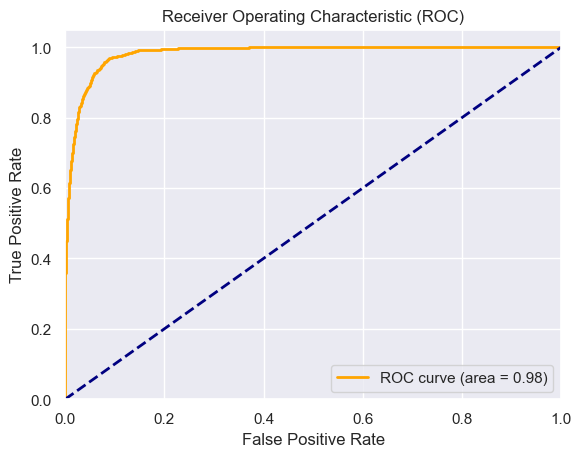

In [201]:
plt.figure()
plt.plot(fpr, tpr, color="orange", lw=2,label=f"ROC curve (area = %0.2f)" % area)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()

### Model Evaluation: Rankorder & KS Statistic

In [208]:
probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]

df_eval = pd.DataFrame({
    'Default Truth':Y_test,
    'Default Probability':probabilities
})

df_eval.head(5)

,Default Truth,Default Probability
33553,0,0.000
9427,0,0.760
199,0,0.142
12447,0,0.426
39489,0,0.001


In [209]:
df_eval["Decile"] = pd.qcut(df_eval["Default Probability"],10,labels=False,duplicates='drop')
df_eval.head(3)

,Default Truth,Default Probability,Decile
33553,0,0.000,1
9427,0,0.760,8
199,0,0.142,7


In [210]:
df_grouped = df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Minimum Probability': x['Default Probability'].min(),
    'Maximum Probability': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-events': x['Default Truth'].count() - x['Default Truth'].sum(),    
}))
df_grouped.reset_index(inplace=True)
df_grouped

C:\Users\91999\AppData\Local\Temp\ipykernel_19448\2314878715.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped = df_eval.groupby('Decile').apply(lambda x: pd.Series({


,Decile,Minimum Probability,Maximum Probability,Events,Non-events
0,0,0.000,0.000,0.000,1250.000
1,1,0.000,0.000,0.000,1250.000
2,2,0.000,0.000,0.000,1250.000
3,3,0.000,0.000,0.000,1249.000
4,4,0.000,0.001,0.000,1250.000
5,5,0.001,0.006,1.000,1249.000
6,6,0.006,0.036,2.000,1247.000
7,7,0.036,0.217,17.000,1233.000
8,8,0.217,0.816,169.000,1081.000
9,9,0.816,1.000,919.000,331.000


In [211]:
df_grouped.sort_values('Decile', ascending=False, inplace=True)
df_grouped

,Decile,Minimum Probability,Maximum Probability,Events,Non-events
9,9,0.816,1.000,919.000,331.000
8,8,0.217,0.816,169.000,1081.000
7,7,0.036,0.217,17.000,1233.000
6,6,0.006,0.036,2.000,1247.000
5,5,0.001,0.006,1.000,1249.000
4,4,0.000,0.001,0.000,1250.000
3,3,0.000,0.000,0.000,1249.000
2,2,0.000,0.000,0.000,1250.000
1,1,0.000,0.000,0.000,1250.000
0,0,0.000,0.000,0.000,1250.000


In [212]:
df_grouped['Event Rate'] = df_grouped['Events']*100 / (df_grouped['Events']+df_grouped['Non-events'])
df_grouped['Non-event Rate'] = df_grouped['Non-events']*100 / (df_grouped['Events']+df_grouped['Non-events'])
df_grouped

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
9,9,0.816,1.000,919.000,331.000,73.520,26.480
8,8,0.217,0.816,169.000,1081.000,13.520,86.480
7,7,0.036,0.217,17.000,1233.000,1.360,98.640
6,6,0.006,0.036,2.000,1247.000,0.160,99.840
5,5,0.001,0.006,1.000,1249.000,0.080,99.920
4,4,0.000,0.001,0.000,1250.000,0.000,100.000
3,3,0.000,0.000,0.000,1249.000,0.000,100.000
2,2,0.000,0.000,0.000,1250.000,0.000,100.000
1,1,0.000,0.000,0.000,1250.000,0.000,100.000
0,0,0.000,0.000,0.000,1250.000,0.000,100.000


In [213]:
df_grouped['Cum Events'] =  df_grouped['Events'].cumsum()
df_grouped['Cum Non-events'] =  df_grouped['Non-events'].cumsum()
df_grouped

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events
9,9,0.816,1.000,919.000,331.000,73.520,26.480,919.000,331.000
8,8,0.217,0.816,169.000,1081.000,13.520,86.480,1088.000,1412.000
7,7,0.036,0.217,17.000,1233.000,1.360,98.640,1105.000,2645.000
6,6,0.006,0.036,2.000,1247.000,0.160,99.840,1107.000,3892.000
5,5,0.001,0.006,1.000,1249.000,0.080,99.920,1108.000,5141.000
4,4,0.000,0.001,0.000,1250.000,0.000,100.000,1108.000,6391.000
3,3,0.000,0.000,0.000,1249.000,0.000,100.000,1108.000,7640.000
2,2,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,8890.000
1,1,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,10140.000
0,0,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,11390.000


In [214]:
df_grouped['Cum Event Rate'] = df_grouped['Cum Events'] * 100 / df_grouped['Events'].sum()
df_grouped['Cum Non-event Rate'] = df_grouped['Cum Non-events']*100 / df_grouped['Non-events'].sum()
df_grouped

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate
9,9,0.816,1.000,919.000,331.000,73.520,26.480,919.000,331.000,82.942,2.906
8,8,0.217,0.816,169.000,1081.000,13.520,86.480,1088.000,1412.000,98.195,12.397
7,7,0.036,0.217,17.000,1233.000,1.360,98.640,1105.000,2645.000,99.729,23.222
6,6,0.006,0.036,2.000,1247.000,0.160,99.840,1107.000,3892.000,99.910,34.170
5,5,0.001,0.006,1.000,1249.000,0.080,99.920,1108.000,5141.000,100.000,45.136
4,4,0.000,0.001,0.000,1250.000,0.000,100.000,1108.000,6391.000,100.000,56.111
3,3,0.000,0.000,0.000,1249.000,0.000,100.000,1108.000,7640.000,100.000,67.076
2,2,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,8890.000,100.000,78.051
1,1,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,10140.000,100.000,89.025
0,0,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,11390.000,100.000,100.000


In [215]:
df_grouped['KS'] = abs(df_grouped['Cum Event Rate'] - df_grouped['Cum Non-event Rate'])
df_grouped

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate,KS
9,9,0.816,1.000,919.000,331.000,73.520,26.480,919.000,331.000,82.942,2.906,80.036
8,8,0.217,0.816,169.000,1081.000,13.520,86.480,1088.000,1412.000,98.195,12.397,85.798
7,7,0.036,0.217,17.000,1233.000,1.360,98.640,1105.000,2645.000,99.729,23.222,76.507
6,6,0.006,0.036,2.000,1247.000,0.160,99.840,1107.000,3892.000,99.910,34.170,65.739
5,5,0.001,0.006,1.000,1249.000,0.080,99.920,1108.000,5141.000,100.000,45.136,54.864
4,4,0.000,0.001,0.000,1250.000,0.000,100.000,1108.000,6391.000,100.000,56.111,43.889
3,3,0.000,0.000,0.000,1249.000,0.000,100.000,1108.000,7640.000,100.000,67.076,32.924
2,2,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,8890.000,100.000,78.051,21.949
1,1,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,10140.000,100.000,89.025,10.975
0,0,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,11390.000,100.000,100.000,0.000


### Save the model

In [217]:
best_model_logistic.coef_,best_model_logistic.intercept_

(array([[ 0.1413006 ,  0.71413987,  0.99351538, 15.33065215, 17.17830597,
         12.98123075,  1.90544067, -1.81426751,  1.82641737,  0.91272025,
         -3.39875975,  1.08595167,  1.08595167]]),
 array([-20.10447565]))

In [218]:
final_model = best_model_logistic

In [219]:
cols_to_scale

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [221]:
from joblib import dump

model_data ={
    'model':final_model,
    'features':X_train_encoded.columns,
    'scaler':scaler,
    'cols_to_scale':cols_to_scale
}

dump(model_data,"artifacts/model_data.joblib")

['artifacts/model_data.joblib']